<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/Series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU


In [2]:
NatGas = yf.Ticker('NG=F')
NatGas


yfinance.Ticker object <NG=F>

In [3]:
META = yf.Ticker('META')
META


yfinance.Ticker object <META>

## **Natural Gas** future

In [4]:
futuro = 'NG=F'
ticker = yf.Ticker(futuro)
hist = ticker.history(start= '2024-01-01', end= '2024-06-30')

hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,2.605,2.675,2.524,2.568,132454,0.0,0.0
2024-01-03 00:00:00-05:00,2.575,2.719,2.537,2.668,166472,0.0,0.0
2024-01-04 00:00:00-05:00,2.688,2.863,2.681,2.821,206311,0.0,0.0
2024-01-05 00:00:00-05:00,2.845,2.906,2.681,2.893,187503,0.0,0.0
2024-01-08 00:00:00-05:00,2.950,3.012,2.694,2.980,237672,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-24 00:00:00-04:00,2.670,2.834,2.635,2.811,45418,0.0,0.0
2024-06-25 00:00:00-04:00,2.816,2.844,2.699,2.756,78233,0.0,0.0
2024-06-26 00:00:00-04:00,2.737,2.746,2.613,2.628,141345,0.0,0.0


In [5]:
serie1 = MinMaxScaler(feature_range=(0,1))
scaled_data1 = serie1.fit_transform(hist['Close'].values.reshape(-1,1))

scaled_data1

array([[5.71346420e-01],
       [6.28883768e-01],
       [7.16916060e-01],
       [7.58342867e-01],
       [8.08400483e-01],
       [9.29229049e-01],
       [8.42347559e-01],
       [8.75719165e-01],
       [1.00000000e+00],
       [7.62370605e-01],
       [7.45109264e-01],
       [6.45569639e-01],
       [5.43153079e-01],
       [4.85615595e-01],
       [5.03452268e-01],
       [6.13348697e-01],
       [5.73072554e-01],
       [6.54200173e-01],
       [5.26467207e-01],
       [2.88837675e-01],
       [3.02071279e-01],
       [2.73302605e-01],
       [2.89988477e-01],
       [2.91714611e-01],
       [2.49712334e-01],
       [2.25546593e-01],
       [1.96777920e-01],
       [1.56501708e-01],
       [1.11047162e-01],
       [6.55926170e-02],
       [1.95626706e-02],
       [3.45219968e-03],
       [1.95626706e-02],
       [5.75332318e-04],
       [1.13924030e-01],
       [9.03336900e-02],
       [1.61104709e-02],
       [4.83314128e-02],
       [2.30149389e-02],
       [1.78365914e-01],


In [6]:
prediction_days = 60

x1 = []
y1 = []

for x in range(prediction_days, len(scaled_data1)):
    x1.append(scaled_data1[x-prediction_days:x, 0])
    y1.append(scaled_data1[x, 0])

x1, y1 = np.array(x1), np.array(y1)
x1 = np.reshape(x1, (x1.shape[0], x1.shape[1], 1))

x1.shape

(64, 60, 1)

In [7]:
model1 = Sequential()

model1.add(GRU(units=50, return_sequences=True, input_shape=(x1.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(GRU(units=50, return_sequences=True))
model1.add(Dropout(0.2))
model1.add(GRU(units=50))
model1.add(Dropout(0.2))
model1.add(Dense(units=1))

model1.compile(optimizer='adam', loss='mean_squared_error')
model1.fit(x1, y1, epochs=25, batch_size=32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 129ms/step - loss: 0.2857
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.1796
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.0882
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0459
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0226
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 0.0425
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 0.0403
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0207
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - loss: 0.0209
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0198
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0301
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0266
Epoch 13/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0156
Epoch 14/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0147
Epoch 15/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0123
Epoch 16/25
2/2 ━━━━━━━━━━━━

In [8]:
hist_test = ticker.history(start= '2024-01-01', end= '2024-06-30')
actual_price = hist_test['Close'].values

total_dataset = pd.concat((hist['Close'], hist_test['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(hist_test) - prediction_days:].values
model_inputs = serie1.transform(model_inputs.reshape(-1, 1))

model_inputs

array([[1.14499431e-01],
       [1.20828498e-01],
       [1.54775574e-01],
       [1.70886045e-01],
       [1.78365914e-01],
       [1.08745696e-01],
       [1.12197896e-01],
       [6.67433502e-02],
       [9.03336900e-02],
       [7.88262206e-02],
       [1.04718027e-01],
       [1.01841159e-01],
       [1.24280766e-01],
       [1.36363636e-01],
       [4.48791445e-02],
       [3.62485425e-02],
       [2.24395380e-02],
       [2.61795136e-01],
       [2.39355598e-01],
       [2.05408522e-01],
       [2.64672072e-01],
       [3.26237019e-01],
       [3.56731827e-01],
       [3.63636364e-01],
       [3.52128894e-01],
       [4.17721580e-01],
       [3.89528238e-01],
       [4.63751458e-01],
       [4.42462653e-01],
       [4.83889460e-01],
       [5.29344006e-01],
       [6.04718027e-01],
       [6.76639779e-01],
       [6.30609902e-01],
       [7.28998861e-01],
       [6.22554700e-01],
       [5.43728411e-01],
       [5.84004554e-01],
       [5.28193341e-01],
       [5.73647887e-01],


In [22]:
x1_test = []

for x in range(prediction_days, len(model_inputs)):
    x1_test.append(model_inputs[x-prediction_days:x, 0])

x1_test = np.array(x1_test)
x1_test = np.reshape(x1_test, (x1_test.shape[0], x1_test.shape[1], 1))

prediction_prices = model1.predict(x1_test)
prediction_prices = serie1.inverse_transform(prediction_prices)

prediction_prices

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step


array([[2.7660074],
       [2.735721 ],
       [2.7151556],
       [2.7173753],
       [2.7412975],
       [2.7829237],
       [2.8481715],
       [2.9091358],
       [2.9618077],
       [3.022398 ],
       [3.0492449],
       [3.0443835],
       [3.007355 ],
       [2.9400122],
       [2.8531365],
       [2.7672575],
       [2.7094815],
       [2.6725821],
       [2.6618605],
       [2.649774 ],
       [2.5982437],
       [2.5229452],
       [2.4389439],
       [2.362246 ],
       [2.2998207],
       [2.2466738],
       [2.19923  ],
       [2.1544814],
       [2.1088824],
       [2.0595465],
       [2.0051863],
       [1.9456922],
       [1.8857503],
       [1.8335738],
       [1.7894757],
       [1.7693927],
       [1.7657738],
       [1.7608044],
       [1.7561413],
       [1.7489482],
       [1.7614801],
       [1.787795 ],
       [1.8171631],
       [1.8502618],
       [1.8863629],
       [1.9189012],
       [1.9362907],
       [1.9396534],
       [1.9307711],
       [1.9119564],


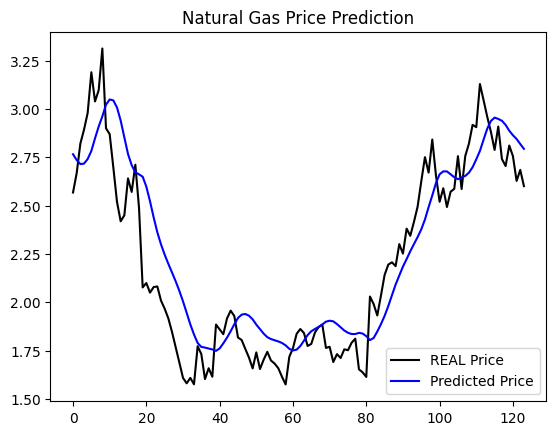

In [28]:
plt.plot(actual_price, color='black', label='REAL Price')
plt.plot(prediction_prices, color='blue', label='Predicted Price')
plt.legend()
plt.title('Natural Gas Price Prediction')
plt.show()

In [30]:
rentability = 1

for i in range(1, len(actual_price)):
  if prediction_prices[i] > actual_price[i-1]:
    rentability*= actual_price[i]/actual_price[i-1]

print((rentability-1)*100, '%')

-11.80043778027211 %


# **META** stock

In [31]:
stock = 'META'
ticker = yf.Ticker(stock)
hist2 = ticker.history(start= '2024-01-01', end= '2024-06-30')

hist2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-02 00:00:00-05:00,350.599548,352.435771,339.312744,345.579865,19042200,0.0,0.0
2024-01-03 00:00:00-05:00,344.272544,347.236455,342.476217,343.763580,15451100,0.0,0.0
2024-01-04 00:00:00-05:00,343.793520,347.436029,342.695770,346.408142,12099900,0.0,0.0
2024-01-05 00:00:00-05:00,346.278421,352.775081,345.549937,351.228271,13920700,0.0,0.0
2024-01-08 00:00:00-05:00,353.972629,358.243851,351.328039,357.924500,13890200,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-24 00:00:00-04:00,499.200012,507.799988,494.290009,498.910004,13525300,0.0,0.0
2024-06-25 00:00:00-04:00,497.049988,510.709991,495.500000,510.600006,12109800,0.0,0.0
2024-06-26 00:00:00-04:00,506.649994,513.809998,504.679993,513.119995,8882300,0.0,0.0


In [32]:
serie2 = MinMaxScaler(feature_range=(0,1))
scaled_data2 = serie2.fit_transform(hist2['Close'].values.reshape(-1,1))

scaled_data2


array([[0.00992216],
       [0.        ],
       [0.01444694],
       [0.04077877],
       [0.07735951],
       [0.07065393],
       [0.14174383],
       [0.13738259],
       [0.16365956],
       [0.12533432],
       [0.13029524],
       [0.17260044],
       [0.21250679],
       [0.20340237],
       [0.22204717],
       [0.25203137],
       [0.26555155],
       [0.27078537],
       [0.30829271],
       [0.30305922],
       [0.24897867],
       [0.27427436],
       [0.71155394],
       [0.62661661],
       [0.60104833],
       [0.68211473],
       [0.68435003],
       [0.67404627],
       [0.67835316],
       [0.63048737],
       [0.70223145],
       [0.76083712],
       [0.70244968],
       [0.69389041],
       [0.67631741],
       [0.77509768],
       [0.76363692],
       [0.75113937],
       [0.78011844],
       [0.76358224],
       [0.79692756],
       [0.86334479],
       [0.84091474],
       [0.7974187 ],
       [0.82945398],
       [0.91731931],
       [0.88326479],
       [0.761

In [33]:
x2 = []
y2 = []

for x in range(prediction_days, len(scaled_data2)):
    x2.append(scaled_data1[x-prediction_days:x, 0])
    y2.append(scaled_data1[x, 0])

x2, y2 = np.array(x2), np.array(y2)
x2 = np.reshape(x2, (x2.shape[0], x2.shape[1], 1))

x2.shape

(64, 60, 1)

In [34]:
model2 = Sequential()

model2.add(GRU(units=50, return_sequences=True, input_shape=(x2.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(GRU(units=50, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(GRU(units=50))
model2.add(Dropout(0.2))
model2.add(Dense(units=1))

model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(x2, y2, epochs=25, batch_size=32)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.2585
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.1503
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0735
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.0210
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0365
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0470
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 0.0338
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.0232
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0205
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.0219
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0226
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0259
Epoch 13/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.0165
Epoch 14/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.0121
Epoch 15/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 0.0149
Epoch 16/25
2/2 ━━━━━━━━━━━━━━━━━

In [35]:
hist2_test = ticker.history(start= '2024-01-01', end= '2024-06-30')
actual_prices = hist2_test['Close'].values

total_dataset = pd.concat((hist2['Close'], hist2_test['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset) - len(hist_test) - prediction_days:].values
model_inputs = serie1.transform(model_inputs.reshape(-1, 1))

model_inputs

array([[292.77230325],
       [302.21057588],
       [297.56042018],
       [296.20963977],
       [297.89379577],
       [299.8078696 ],
       [293.33559666],
       [286.6276641 ],
       [286.35750099],
       [283.14435807],
       [287.53009246],
       [275.61441747],
       [275.99379769],
       [284.25371949],
       [282.75921849],
       [252.80047231],
       [253.89835014],
       [247.76519459],
       [246.3569435 ],
       [251.54164849],
       [252.97291946],
       [258.88188142],
       [266.76818237],
       [268.23968106],
       [270.7458451 ],
       [272.36678862],
       [272.81514068],
       [268.10749674],
       [270.314736  ],
       [275.88458057],
       [271.1079648 ],
       [270.34922192],
       [268.58457536],
       [266.16466123],
       [267.97527731],
       [266.8256706 ],
       [273.97623098],
       [274.9534081 ],
       [271.75747301],
       [267.55566937],
       [267.4292093 ],
       [273.55662304],
       [273.26921698],
       [283

In [39]:
x2_test = []

for x in range(prediction_days, len(model_inputs)):
    x2_test.append(model_inputs[x-prediction_days:x, 0])

x2_test = np.array(x2_test)
x2_test = np.reshape(x2_test, (x2_test.shape[0], x2_test.shape[1], 1))

prediction_prices = model2.predict(x2_test)
prediction_prices = serie2.inverse_transform(prediction_prices)

prediction_prices

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step


array([[801.3207 ],
       [801.65326],
       [802.2329 ],
       [802.9651 ],
       [803.79205],
       [804.6589 ],
       [805.538  ],
       [806.3585 ],
       [807.13354],
       [807.8603 ],
       [808.5695 ],
       [809.2492 ],
       [809.86676],
       [810.4516 ],
       [811.0186 ],
       [811.49316],
       [811.85156],
       [812.1696 ],
       [812.43665],
       [812.68195],
       [812.9324 ],
       [813.2031 ],
       [813.4996 ],
       [813.7302 ],
       [813.91626],
       [814.06946],
       [814.1846 ],
       [814.26373],
       [814.3143 ],
       [814.3623 ],
       [814.41125],
       [814.43646],
       [814.4444 ],
       [814.4407 ],
       [814.4302 ],
       [814.4228 ],
       [814.4133 ],
       [814.41736],
       [814.4153 ],
       [814.39386],
       [814.35986],
       [814.3294 ],
       [814.3049 ],
       [814.288  ],
       [814.2897 ],
       [814.28564],
       [814.2792 ],
       [814.2816 ],
       [814.29443],
       [814.3017 ],


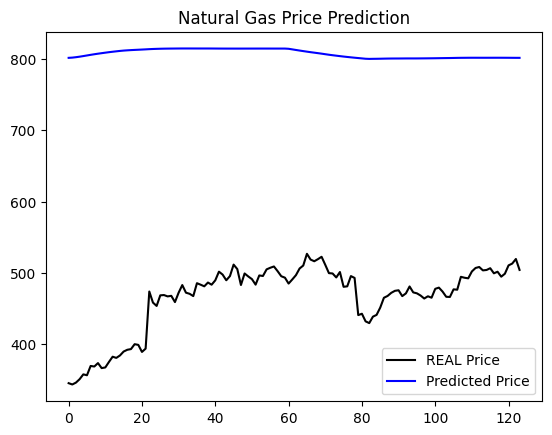

In [40]:
plt.plot(actual_prices, color='black', label='REAL Price')
plt.plot(prediction_prices, color='blue', label='Predicted Price')
plt.legend()
plt.title('Natural Gas Price Prediction')
plt.show()

In [41]:
rentability = 1

for i in range(1, len(actual_price)):
  if prediction_prices[i] > actual_price[i-1]:
    rentability*= actual_price[i]/actual_price[i-1]

print((rentability-1)*100, '%')

1.2850463927446265 %
